In [36]:
#Jorge Santos
#Image Classification Project
#Artificial Intelligence class

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
data_dir = 'data' 

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

NotADirectoryError: [Errno 20] Not a directory: 'data/.DS_Store'

In [ ]:
#define where we are pulling our data from 'data'

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

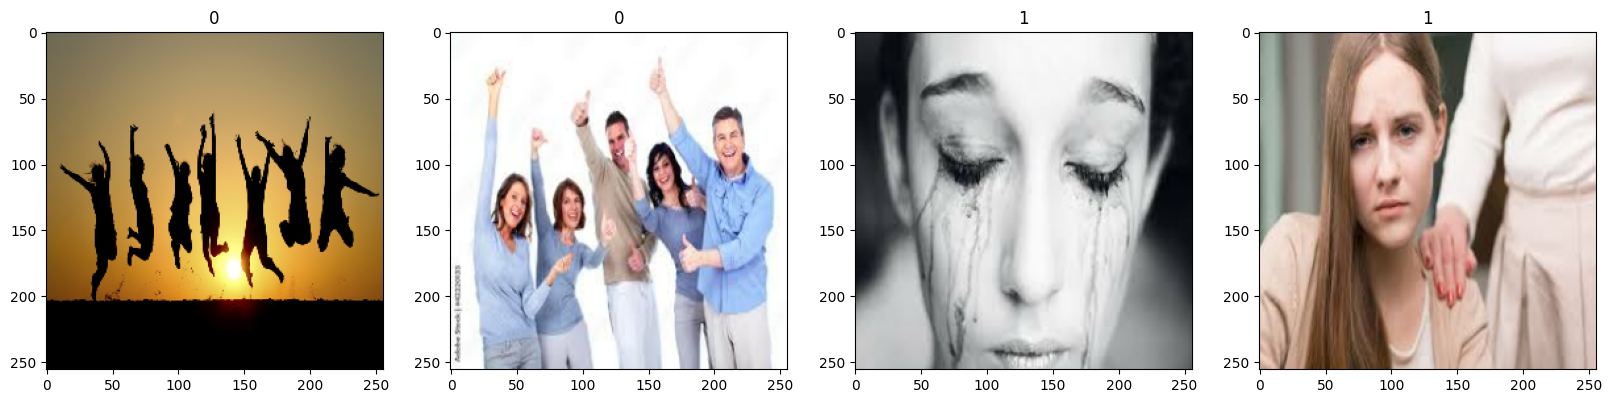

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
#here we show the numpy array representation of our data

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.6784314 , 0.38431373, 0.5529412 ],
          [0.67886794, 0.3847503 , 0.55337775],
          [0.68235296, 0.3882353 , 0.5568628 ],
          ...,
          [0.85170805, 0.5654335 , 0.5301394 ],
          [0.8509804 , 0.5647059 , 0.5294118 ],
          [0.8509804 , 0.5647059 , 0.5294118 ]],
 
         [[0.6784314 , 0.38431373, 0.5529412 ],
          [0.67886794, 0.3847503 , 0.55337775],
          [0.68235296, 0.3882353 , 0.5568628 ],
          ...,
          [0.85170805, 0.5654335 , 0.5301394 ],
          [0.8509804 , 0.5647059 , 0.5294118 ],
          [0.8509804 , 0.5647059 , 0.5294118 ]],
 
         [[0.6784314 , 0.38431373, 0.5529412 ],
          [0.67886794, 0.3847503 , 0.55337775],
          [0.68235296, 0.3882353 , 0.5568628 ],
          ...,
          [0.8528339 , 0.56768537, 0.52901345],
          [0.85210633, 0.5669577 , 0.52828586],
          [0.85210633, 0.5669577 , 0.52828586]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [ ]:
#here we define the size of our training, validation, and test dataset size
#if the size of the dataset is changed, these number may need to be modified

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [35]:
train_size

7

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [37]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#here we define the layers that our model will consist of
#this is a CNN that will consist of 3 convolutional layers, 3 maxpooling layers, 1 flatten layer
#and 2 dense layers

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#here we compile our model. We also define the optimizer ADAM and our Loss function(Binary Crossentropy)

In [40]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [42]:
logdir='logs'

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
#we can see how the metrics will change as the model completes multiple iterations and learns.

In [44]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 5s 494ms/step - loss: 1.1187 - accuracy: 0.4866 - val_loss: 0.6527 - val_accuracy: 0.7344
Epoch 2/20
7/7 [==============================] - 4s 476ms/step - loss: 0.6380 - accuracy: 0.6384 - val_loss: 0.6367 - val_accuracy: 0.6406
Epoch 3/20
7/7 [==============================] - 4s 480ms/step - loss: 0.5890 - accuracy: 0.7321 - val_loss: 0.5061 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 4s 480ms/step - loss: 0.5247 - accuracy: 0.7500 - val_loss: 0.3937 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 4s 480ms/step - loss: 0.4206 - accuracy: 0.8259 - val_loss: 0.3705 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 4s 482ms/step - loss: 0.3713 - accuracy: 0.8304 - val_loss: 0.3205 - val_accuracy: 0.8594
Epoch 7/20
7/7 [==============================] - 4s 475ms/step - loss: 0.3117 - accuracy: 0.8750 - val_loss: 0.2993 - val_accuracy: 0.8594
Epoch 8/20
7/7 [====

In [ ]:
#as you can see the result of the loss function continues to decrease
#this means the model is learning correctly

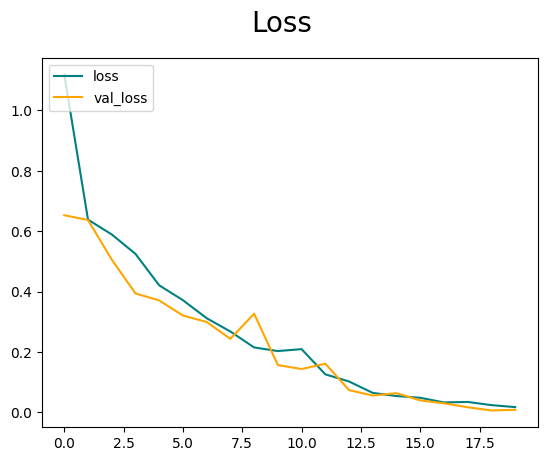

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

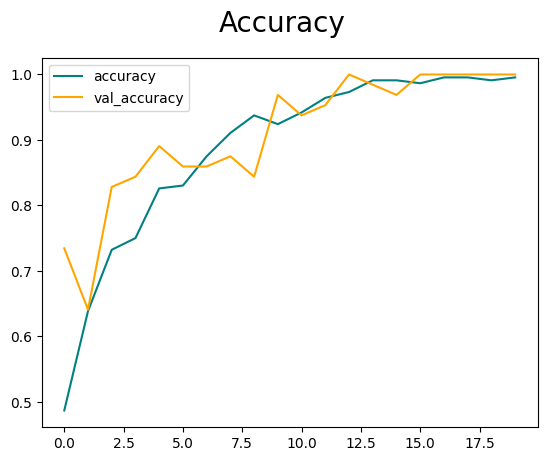

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 87ms/step


In [51]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


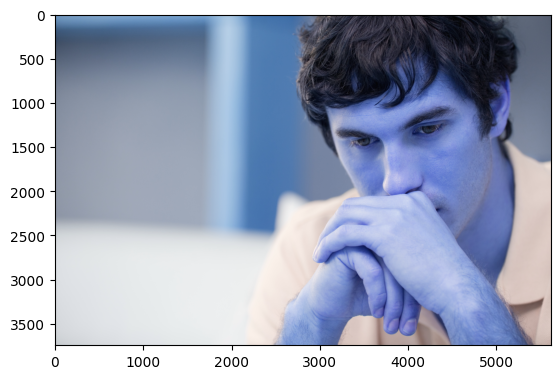

In [52]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

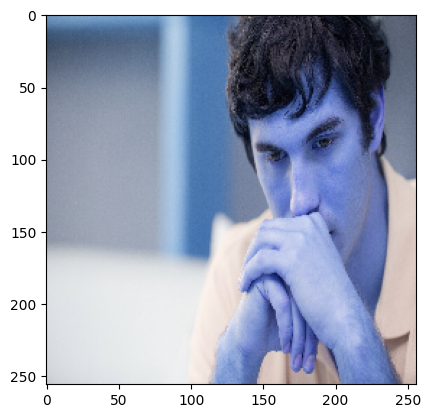

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
#in this last step we will test our model with a test image

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [55]:
yhat

array([[0.73878115]], dtype=float32)

In [56]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))